In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [34]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    std_n = np.copy(std)
    #std_n[std_n == 0] = 1
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    print(pd.DataFrame(X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''

    h_thetha = np.dot(X, theta.T)
    
    return h_thetha

In [8]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    J = (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y)**2)
    
    return J

In [9]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    
    d_theta = (1/(np.shape(X)[0])) * np.dot(X.T, hypothesis(X,theta) - y).T
    
    return d_theta

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        delta = abs(J_history[-1] - J)

        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [11]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [2]:
df = pd.read_csv('train.csv')
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
132,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
133,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
134,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [3]:
from datetime import datetime
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['Open Date'] = (pd.to_datetime("today") - df['Open Date']).astype('<m8[Y]')
df.rename(columns = {'Open Date' : 'Age'}, inplace = True)
labelencoder = LabelEncoder()
df['City Group'] = labelencoder.fit_transform(df['City Group'])
df['City'] = labelencoder.fit_transform(df['City'])
df['Type'] = labelencoder.fit_transform(df['Type'])
df


,Id,Age,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,22.0,31,0,1,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,14.0,3,0,0,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,9.0,10,1,1,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,10.0,28,1,1,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,12.0,14,1,1,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,13.0,29,1,0,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
132,133,15.0,32,0,0,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
133,134,15.0,18,1,0,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
134,135,11.0,31,0,0,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [113]:
corr_matrix = df.corr()
corr_matrix["revenue"].sort_values(ascending = False)

revenue       1.000000
Age           0.333146
City          0.265574
P2            0.190452
P28           0.154751
P6            0.140860
P21           0.097196
P11           0.083178
P22           0.082040
P1            0.068589
P17           0.066272
P7            0.048280
P23           0.044956
P4            0.036888
P25           0.035364
P19           0.026749
P24           0.013140
P20           0.012902
P14           0.005488
P15          -0.000328
Id           -0.003694
P26          -0.008704
P27          -0.014726
P37          -0.020239
P5           -0.024173
P33          -0.033730
P3           -0.034684
P18          -0.035680
P16          -0.039075
P31          -0.041498
P9           -0.050823
P35          -0.051327
P36          -0.051581
P12          -0.062498
P32          -0.066823
P30          -0.067191
P34          -0.073314
P10          -0.073746
P8           -0.084390
Type         -0.098629
P13          -0.105255
P29          -0.115024
City Group   -0.239730
Name: reven

In [5]:
cat = ['City']
num = ['Age', 'City Group', 'Type', 'P28', 'P29', 'P6', 'P2', 'P13', 'P8', 'P10', 'P34', 'P30', 'P32', 'P12']#-p2 i p6 
all_col = cat + num

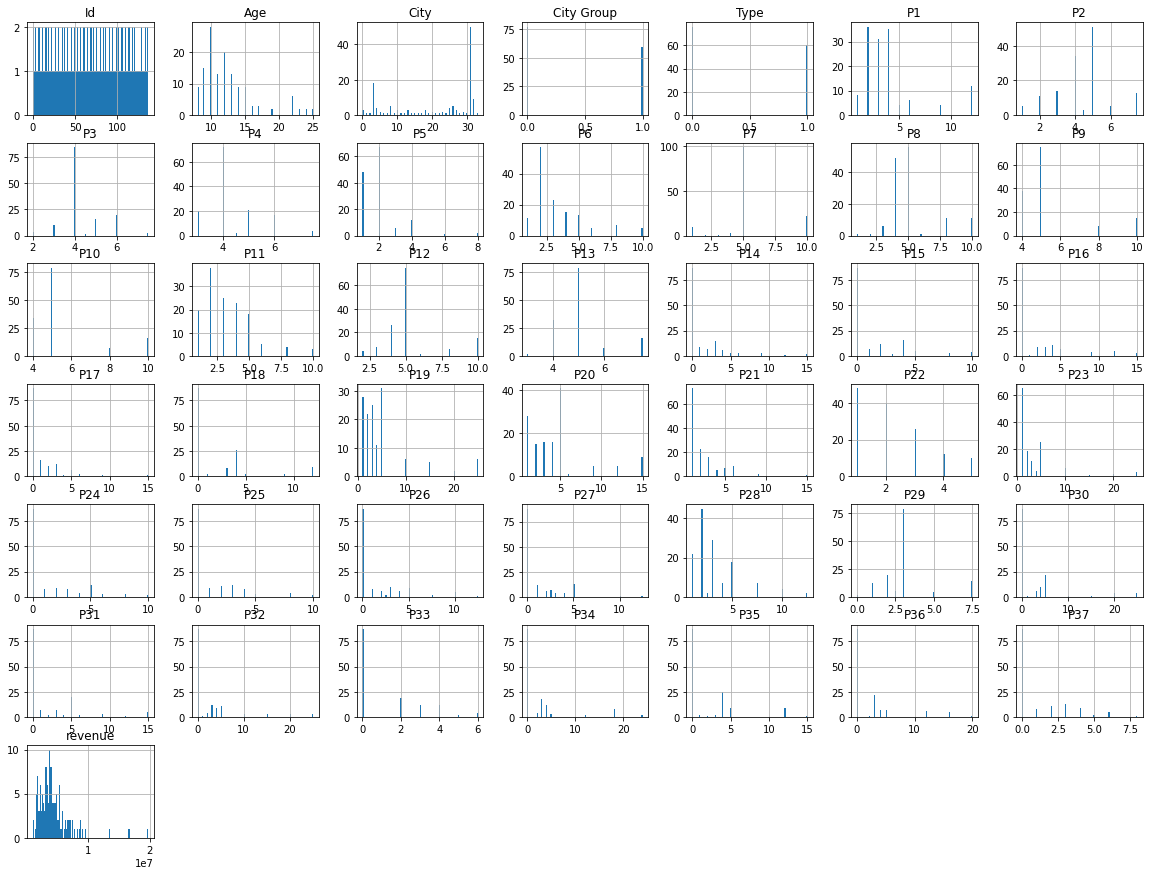

In [6]:

df.hist(bins = 100, figsize = (20,15))
plt.show()

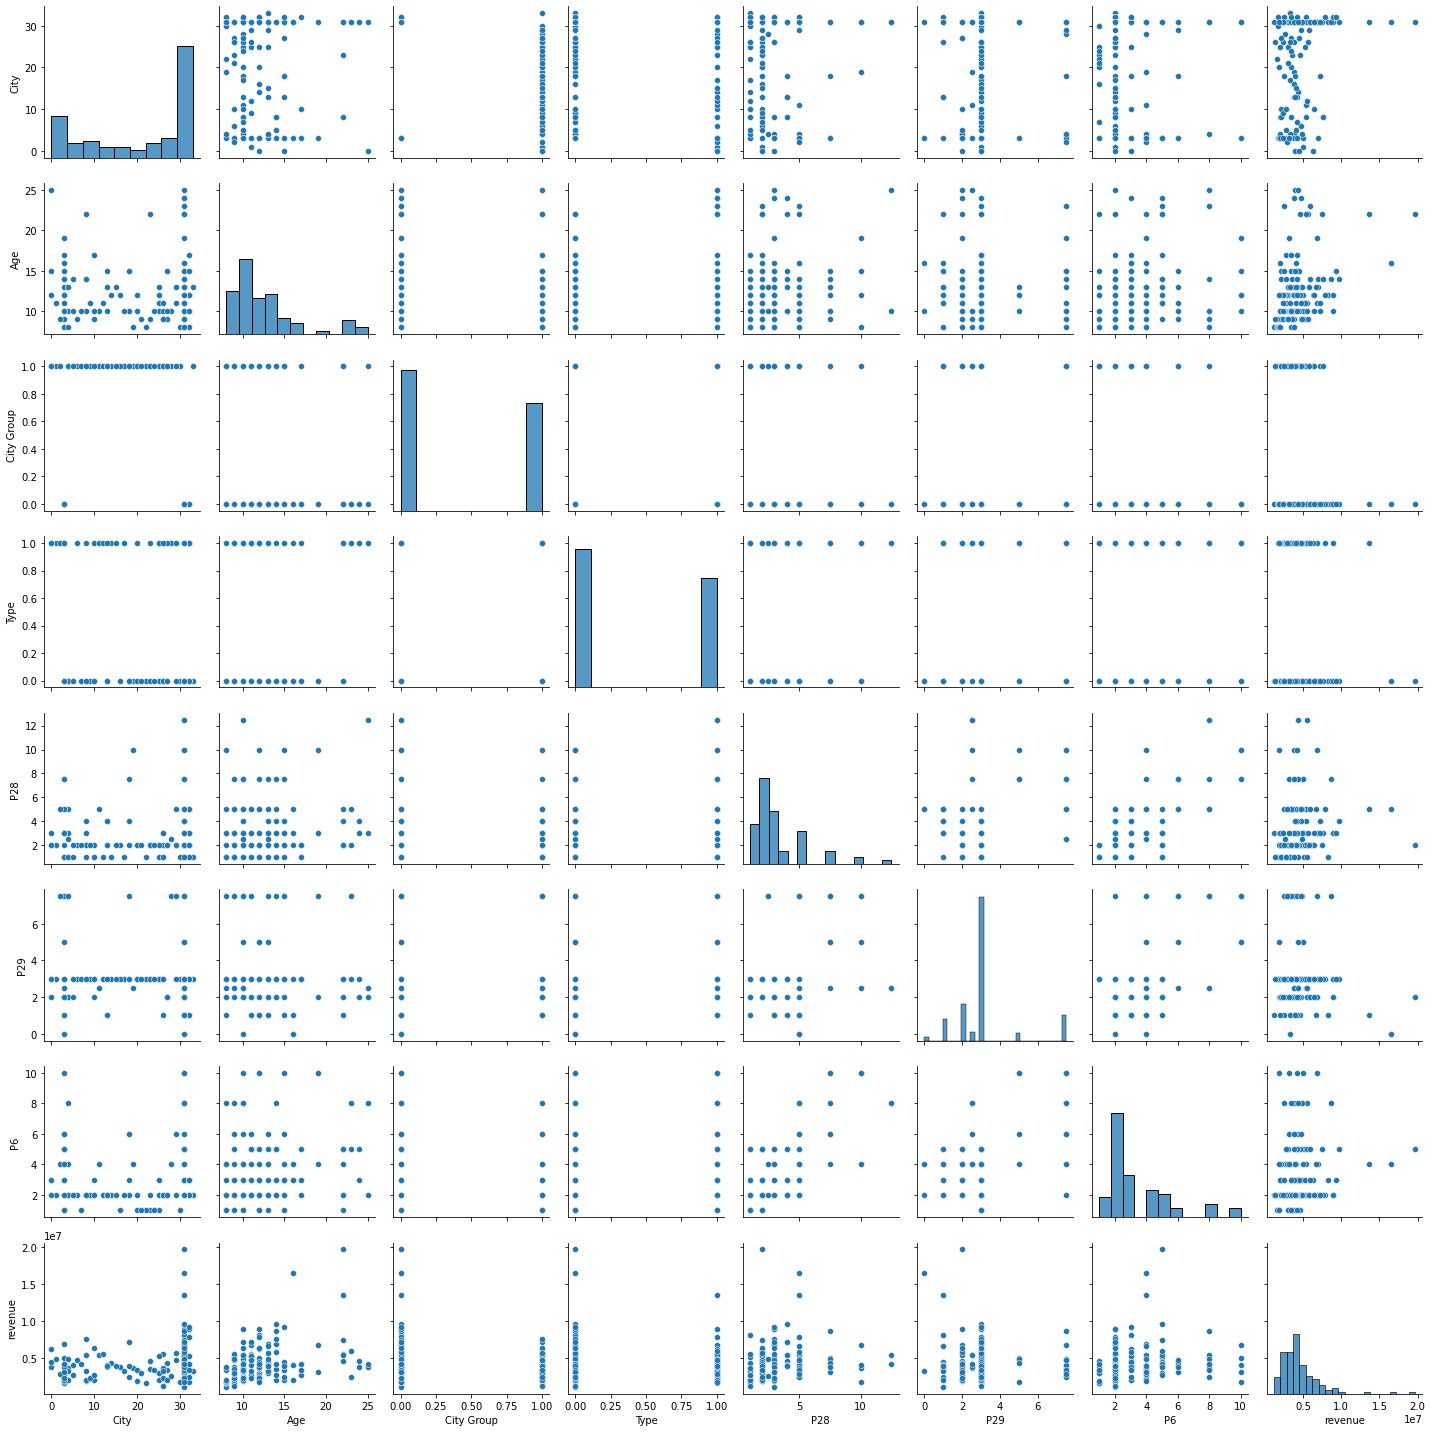

In [10]:
import seaborn as sns
cols = all_col[:7] + ['revenue']
sns.pairplot(df[cols])
plt.tight_layout()
plt.show()

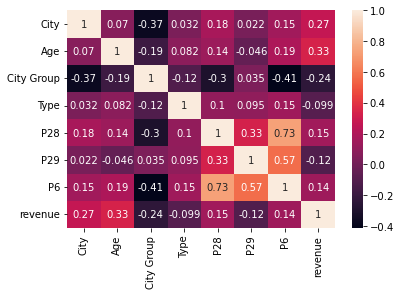

In [12]:
cm = df[cols].corr()
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          136 non-null    int64  
 1   Age         136 non-null    float64
 2   City        136 non-null    int32  
 3   City Group  136 non-null    int32  
 4   Type        136 non-null    int32  
 5   P1          136 non-null    int64  
 6   P2          136 non-null    float64
 7   P3          136 non-null    float64
 8   P4          136 non-null    float64
 9   P5          136 non-null    int64  
 10  P6          136 non-null    int64  
 11  P7          136 non-null    int64  
 12  P8          136 non-null    int64  
 13  P9          136 non-null    int64  
 14  P10         136 non-null    int64  
 15  P11         136 non-null    int64  
 16  P12         136 non-null    int64  
 17  P13         136 non-null    float64
 18  P14         136 non-null    int64  
 19  P15         136 non-null    i

In [115]:

onehotencoder = OneHotEncoder()

X, y = df[cat + num], df['revenue']
print('X shape = ',X.shape)
print('y shape = ', y.shape)

X = X.join(pd.DataFrame(onehotencoder.fit_transform(X[['City']]).toarray()))
X = X.drop(['City'],  axis=1)
X


X shape =  (136, 15)
y shape =  (136,)


,Age,City Group,Type,P28,P29,P6,P2,P13,P8,P10,...,24,25,26,27,28,29,30,31,32,33
0,22.0,0,1,2.0,3.0,2,5.0,5.0,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14.0,0,0,3.0,3.0,2,5.0,5.0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,1,1,1.0,3.0,3,4.0,5.0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,1,1,2.5,7.5,4,4.5,7.5,8,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,12.0,1,1,1.0,3.0,2,4.0,5.0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,13.0,1,0,2.0,3.0,2,3.0,4.0,4,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
132,15.0,0,0,3.0,3.0,3,5.0,5.0,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
133,15.0,1,0,2.0,3.0,3,4.0,5.0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,11.0,0,0,3.0,3.0,2,5.0,5.0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
#X, mean, std = normalize(X)#
X = preprocessing.normalize(X)
X

array([[0.84057679, 0.        , 0.03820804, ..., 0.03820804, 0.        ,
        0.        ],
       [0.75482941, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60816364, 0.06757374, 0.06757374, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.78513588, 0.05234239, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67068184, 0.        , 0.        , ..., 0.06097108, 0.        ,
        0.        ],
       [0.72494651, 0.        , 0.        , ..., 0.06041221, 0.        ,
        0.        ]])

In [117]:

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)



# Sclearn regression

In [118]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [119]:
df_print = pd.DataFrame()
y_train_pred = regression.predict(X_train)

rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
res


,y_actual,y_pred,err
63,1619683.0,4.278192e+06,164.137599
130,3199619.0,4.062176e+06,26.958118
118,1847826.0,4.548562e+06,146.157482
18,5337526.0,4.335702e+06,18.769440
99,13575224.0,4.631668e+06,65.881462
81,4066618.0,4.182846e+06,2.858088
120,4067566.0,4.255084e+06,4.610087
86,3351383.0,4.342188e+06,29.564054
43,2732645.0,4.396698e+06,60.895314
119,3780019.0,4.106620e+06,8.640190


In [120]:
MAE_sklearn = mean_absolute_error(y_train, y_train_pred)
MSE_sklearn = mean_squared_error(y_train, y_train_pred)
RMSE_sklearn = mean_squared_error(y_train, y_train_pred, squared = False)
print('MAE = ', MAE_sklearn, '\nMSE = ', MSE_sklearn, '\nRMSE = ', RMSE_sklearn)

MAE =  1391369.2226014365 
MSE =  4324288523578.737 
RMSE =  2079492.3716086906


In [121]:
print(y_test.shape)
print(X_test.shape)
y_test_pred = regression.predict(X_test)

rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
res

(28,)
(28, 48)


,y_actual,y_pred,err
63,1619683.0,2.267489e+06,39.995873
130,3199619.0,6.329937e+06,97.834071
118,1847826.0,5.490402e+06,197.127640
18,5337526.0,2.631463e+06,50.698834
99,13575224.0,6.493166e+06,52.168995
81,4066618.0,7.323212e+06,80.081135
120,4067566.0,2.523224e+06,37.967222
86,3351383.0,4.486150e+06,33.859654
43,2732645.0,2.576412e+06,5.717265
119,3780019.0,4.343805e+06,14.914896


In [122]:
MAE_sklearn = mean_absolute_error(y_test, y_test_pred)
MSE_sklearn = mean_squared_error(y_test, y_test_pred)
RMSE_sklearn = mean_squared_error(y_test, y_test_pred, squared = False)
print('MAE = ', MAE_sklearn, '\nMSE = ', MSE_sklearn, '\nRMSE = ', RMSE_sklearn)

MAE =  1958847.3327482115 
MSE =  6461113237162.195 
RMSE =  2541871.9946453236


# Custom regression

In [123]:
X = prepare_X(X_train)

print('X: {}'.format(X_train.shape))
print('y: {}'.format(y.shape))
theta = np.zeros(X_train.shape[1])
#print(cost_function(X_train, y_train, theta))

      0         1         2         3         4         5         6   \
0    1.0  0.880830  0.000000  0.000000  0.058722  0.176166  0.058722   
1    1.0  0.751469  0.062622  0.000000  0.125245  0.187867  0.062622   
2    1.0  0.443478  0.000000  0.019282  0.096408  0.144612  0.154253   
3    1.0  0.785136  0.052342  0.000000  0.104685  0.157027  0.157027   
4    1.0  0.882120  0.040096  0.000000  0.160385  0.120289  0.080193   
..   ...       ...       ...       ...       ...       ...       ...   
103  1.0  0.664534  0.000000  0.000000  0.181237  0.181237  0.181237   
104  1.0  0.526685  0.000000  0.058521  0.175562  0.175562  0.292603   
105  1.0  0.886460  0.000000  0.036936  0.110808  0.110808  0.184679   
106  1.0  0.546069  0.042005  0.000000  0.105013  0.315040  0.084011   
107  1.0  0.499363  0.000000  0.000000  0.267516  0.267516  0.285351   

           7         8         9   ...   39   40   41   42   43   44   45  \
0    0.058722  0.234888  0.234888  ...  0.0  0.0  0.0  0.0

In [124]:
alpha = 0.01
num_iters = 1500

In [125]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, num_iters, False)
print(new_theta)

[ 3.99321887e+06 -1.46131341e+05 -5.47536555e+04  1.33735141e+06
  3.92204105e+05  1.22462395e+06  1.44108384e+06  8.18958477e+05
  7.69809716e+05  9.70301999e+05  5.40159085e+05  6.36604357e+05
  4.95839239e+05  9.96832204e+05  1.54253732e+04  6.58208523e+03
 -1.26394616e+02 -1.14089790e+05 -2.55957187e+04 -1.16659558e+04
  5.55804862e+03  1.03147274e+03  9.70481266e+03  0.00000000e+00
 -1.11222836e+04  9.50042888e+03  1.03987185e+04 -9.66622934e+03
  1.89600621e+02 -2.08008416e+03 -3.96590517e+03 -8.82675626e+03
  1.15108358e+04  1.06012297e+02 -2.77841995e+04 -1.14082820e+04
  0.00000000e+00 -7.28303466e+03  0.00000000e+00 -4.44770494e+04
 -1.27736182e+04 -2.27292064e+04 -6.09986812e+02  1.84662756e+04
 -2.52302484e+04  3.54211854e+05  5.90160940e+04 -9.26005223e+03]


In [126]:

y_test_pred = hypothesis(X_test, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100


res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test, y_test, new_theta))

       y_actual        y_pred         err
63    1619683.0  4.177305e+06  157.908782
130   3199619.0  4.858417e+06   51.843624
118   1847826.0  3.520744e+06   90.534382
18    5337526.0  4.535731e+06   15.021842
99   13575224.0  4.939504e+06   63.613831
81    4066618.0  4.812211e+06   18.334465
120   4067566.0  4.555004e+06   11.983538
86    3351383.0  4.556448e+06   35.957258
43    2732645.0  4.601762e+06   68.399568
119   3780019.0  4.436962e+06   17.379355
62    5286212.0  4.742198e+06   10.291197
73    3347767.0  4.708147e+06   40.635442
5     5017319.0  4.424674e+06   11.811976
35    3903884.0  4.842521e+06   24.043670
97    6694797.0  4.922490e+06   26.472905
129   3376145.0  4.491064e+06   33.023424
92    6782425.0  4.701414e+06   30.682399
60    3164972.0  3.331386e+06    5.258004
31    2058644.0  4.579186e+06  122.436981
6     5166635.0  4.657071e+06    9.862582
95    1270499.0  4.404881e+06  246.704810
83    5966193.0  4.865810e+06   18.443636
54    4651866.0  4.635595e+06    0

In [127]:
MAE_c = mean_absolute_error(y_test, y_test_pred)
MSE_c = mean_squared_error(y_test, y_test_pred)
RMSE_c = mean_squared_error(y_test, y_test_pred, squared = False)


rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
res

print('MAE custom = ', MAE_c, '   MAE scl = ', MAE_sklearn,
      '\nMSE custom = ', MSE_c,'   MSE scl = ', MSE_sklearn,
      '\nRMSE custom = ', RMSE_c, '   RMSE scl = ', RMSE_sklearn)

MAE custom =  1566111.7532633229    MAE scl =  1958847.3327482115 
MSE custom =  4966416814589.529    MSE scl =  6461113237162.195 
RMSE custom =  2228545.8968999335    RMSE scl =  2541871.9946453236
